In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import os 
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [79]:
!git clone https://github.com/Jeniffer2018/Redes-Neurais
% cd Redes-Neurais
!ls 

fatal: destination path 'Redes-Neurais' already exists and is not an empty directory.
/content/Redes-Neurais/Redes-Neurais/Redes-Neurais/Redes-Neurais
 Dados1.csv	    imagem.1.csv     README.md
 dados.csv	    imagem.2.csv     Sim5Des1_568_preto_original2_red1.jpg
'Dados_T(1).csv'    imagem.3.csv     Sim5Des1_568_preto_original2_red1.png
 Dados_T.csv	    imagem.4.csv    'Untitled 2.csv'
 Dados_teste1.txt   imagem.568.csv   Y_test.csv
 Dados_train1.txt   imagem.570.csv   Y_train.csv
 imagem.0.csv	    imagem.5.csv


In [0]:
y_train=pd.read_csv("Y_train.csv")
#print(Y_train)
y_test=pd.read_csv("Y_test.csv")
#print(Y_test)

In [81]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving imagem_test.zip to imagem_test.zip
Saving imagem_train.zip to imagem_train.zip


In [82]:
print("Path at terminal when executing this file")
print(os.getcwd() + "\n")

Path at terminal when executing this file
/content/Redes-Neurais/Redes-Neurais/Redes-Neurais/Redes-Neurais



In [0]:
import zipfile
file_name_test = zipfile.ZipFile('imagem_test.zip', 'r')
file_name_test.extractall() 
file_name_train = zipfile.ZipFile('imagem_train.zip', 'r')
file_name_train.extractall() 

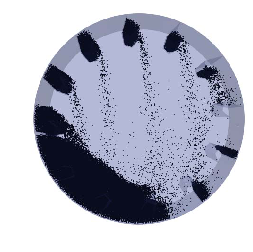

In [84]:
img=plt.imread("13Sim5A_524.jpg")
plt.axis("off")
plt.imshow(img)
plt.show()

OpenCV uses BGR as its default colour order for images, matplotlib uses RGB

In [0]:
FILE='imagem_test.zip'
img_name_test=[]
x_test=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name_test.append(name)
        x_test.append(cv2.resize(cv2.imread(name),(64,64)))
#print(img_name_test)
#print(x_test)

FILE='imagem_train.zip'
img_name_train=[]
x_train=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name_train.append(name)
        x_train.append(cv2.resize(cv2.imread(name),(64,64)))
#print(img_name_train)
#print(x_train)

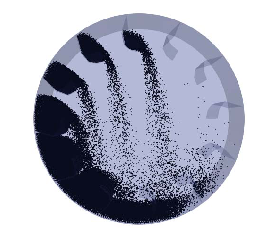

In [97]:
img_test=plt.imread(img_name_test[7]) #para leitura de arquivos em jpg
plt.axis("off")
plt.imshow(img_test)

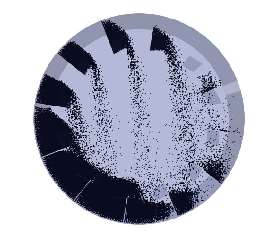

In [98]:
img_train=plt.imread(img_name_train[2]) #para leitura de arquivos em jpg
plt.axis("off")
plt.imshow(img_train)

In [0]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [100]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen  = ImageDataGenerator(rescale= 1./255)
print(test_datagen)

In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [102]:
batch_size = 32
training_set = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_set = test_datagen.flow(x_test,y_test, batch_size=batch_size)
print(test_set)

In [103]:
classifier.fit_generator(training_set,
                         steps_per_epoch =10,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 50)

Epoch 1/10
10/10 [==============================] - 2s 178ms/step - loss: 0.5059 - acc: 0.0366 - val_loss: 0.5436 - val_acc: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 2s 215ms/step - loss: 0.4807 - acc: 0.0565 - val_loss: 0.5448 - val_acc: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 2s 215ms/step - loss: 0.4949 - acc: 0.0366 - val_loss: 0.5437 - val_acc: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 2s 211ms/step - loss: 0.5020 - acc: 0.0366 - val_loss: 0.5436 - val_acc: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 2s 212ms/step - loss: 0.5004 - acc: 0.0366 - val_loss: 0.5440 - val_acc: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 2s 214ms/step - loss: 0.4890 - acc: 0.0366 - val_loss: 0.5447 - val_acc: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 2s 212ms/step - loss: 0.4914 - acc: 0.0366 - val_loss: 0.5438 - val_acc: 0.0000e+00
Epoch 8/10
10/10 [==============================